# Generation of Random Data

## Importing Libraries

In [ ]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout, BatchNormalization

## Defining the data points


### Employee Attributes:

*   Employee ID
*   Department
*   Career Goals
*   Emotional Support Needs
*   Skill Development Areas
*   Preferred Coaching Style
*   Availability

In [ ]:
departments = ['IT', 'HR', 'Finance', 'Marketing', 'Sales']
career_goals = ['Leadership', 'Management', 'Technical Expertise', 'Soft Skills Improvement']
emotional_support_needs = ['High', 'Medium', 'Low']
skill_development_areas = ['Python', 'Data Analysis', 'Communication', 'Recruitment', 'Project Management']
coaching_styles = ['Structured', 'Flexible', 'Mentorship']
availability_hours = list(range(9, 18))  # 9 AM to 5 PM

### Coach Attributes:
*   Coach ID
*   Certifications
*   Specializations (Career, Emotional, Skill Up)
*   Coaching Style
*   Experience Level
*   Availability

In [ ]:
certifications = ['PCC', 'ICF', 'ACC', 'BCC']
specializations = ['Career', 'Emotional', 'Skill Up']

## Assigning Random inputs

### Random inputs to the Employee Attributes

In [ ]:
employees = []
for i in range(100):
    employee = {
        'EmployeeID': f'E{i+1}',
        'Department': random.choice(departments),
        'CareerGoals': random.choice(career_goals),
        'EmotionalSupportNeeds': random.choice(emotional_support_needs),
        'SkillDevelopmentAreas': random.sample(skill_development_areas, 2),
        'CoachingStyle': random.choice(coaching_styles),
        'Availability': random.sample(availability_hours, 3)
    }
    employees.append(employee)

### Random inputs to the Coach Attributes

In [ ]:
coaches = []
for i in range(10):
    coach = {
        'CoachID': f'C{i+1}',
        'Certifications': random.sample(certifications, 2),
        'Specializations': random.sample(specializations, 2),
        'CoachingStyle': random.choice(coaching_styles),
        'ExperienceLevel': random.randint(1, 20),
        'Availability': random.sample(availability_hours, 3)
    }
    coaches.append(coach)

## Converting them into dataframes

### Employee Dataframe

In [ ]:
employees_df = pd.DataFrame(employees)
display(employees_df)

,EmployeeID,Department,CareerGoals,EmotionalSupportNeeds,SkillDevelopmentAreas,CoachingStyle,Availability
0,E1,Marketing,Management,Medium,"[Communication, Python]",Structured,"[10, 15, 13]"
1,E2,HR,Soft Skills Improvement,High,"[Data Analysis, Recruitment]",Mentorship,"[9, 15, 16]"
2,E3,Finance,Technical Expertise,High,"[Data Analysis, Recruitment]",Structured,"[12, 14, 13]"
3,E4,Sales,Management,Medium,"[Python, Communication]",Mentorship,"[15, 13, 9]"
4,E5,Finance,Soft Skills Improvement,High,"[Data Analysis, Recruitment]",Flexible,"[15, 14, 9]"
...,...,...,...,...,...,...,...
95,E96,Finance,Management,Medium,"[Python, Recruitment]",Mentorship,"[15, 14, 11]"
96,E97,HR,Management,Medium,"[Recruitment, Communication]",Structured,"[10, 13, 12]"
97,E98,HR,Leadership,High,"[Python, Communication]",Structured,"[10, 12, 16]"
98,E99,IT,Technical Expertise,Medium,"[Python, Project Management]",Flexible,"[11, 17, 13]"


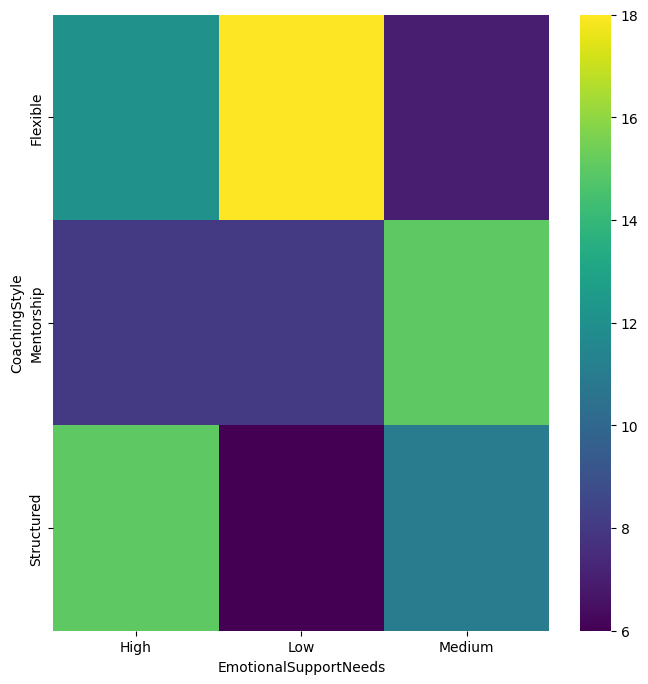

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CoachingStyle'].value_counts()
    for x_label, grp in employees_df.groupby('EmotionalSupportNeeds')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('EmotionalSupportNeeds')
_ = plt.ylabel('CoachingStyle')

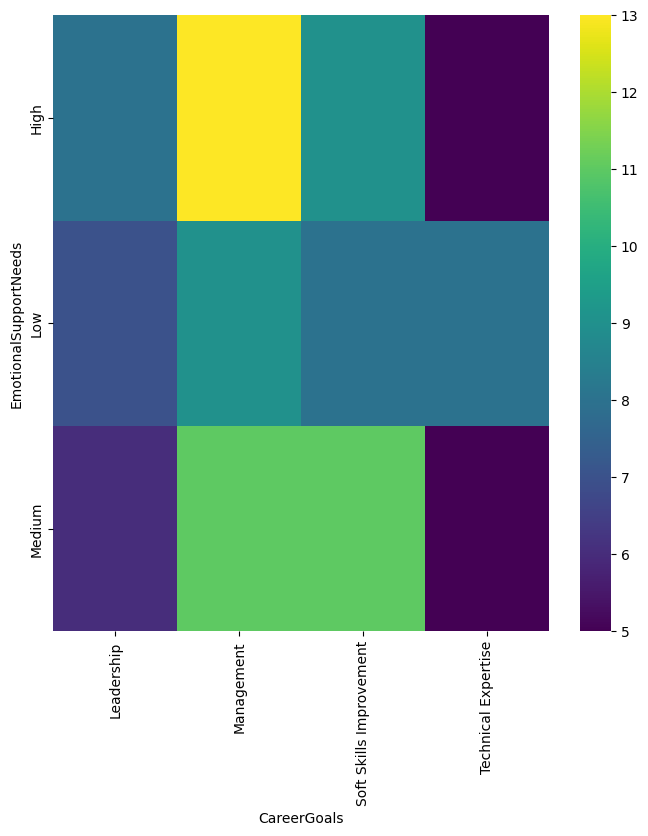

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EmotionalSupportNeeds'].value_counts()
    for x_label, grp in employees_df.groupby('CareerGoals')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CareerGoals')
_ = plt.ylabel('EmotionalSupportNeeds')

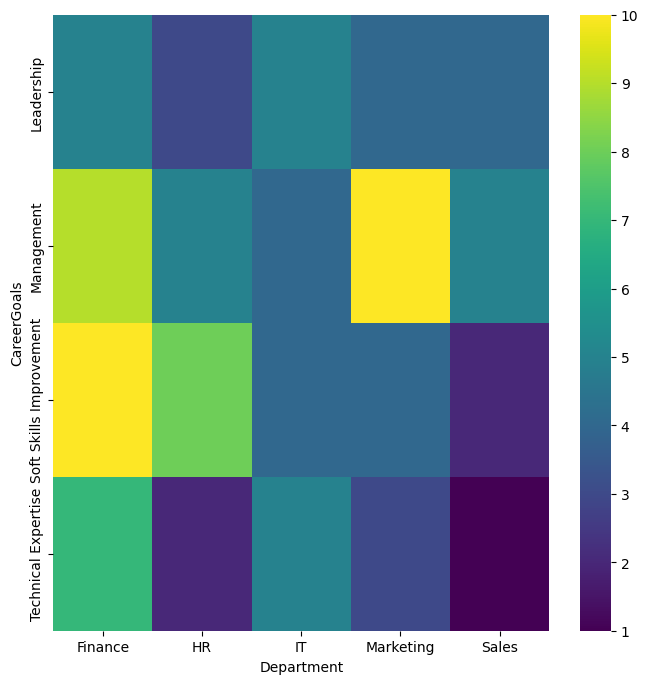

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CareerGoals'].value_counts()
    for x_label, grp in employees_df.groupby('Department')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Department')
_ = plt.ylabel('CareerGoals')

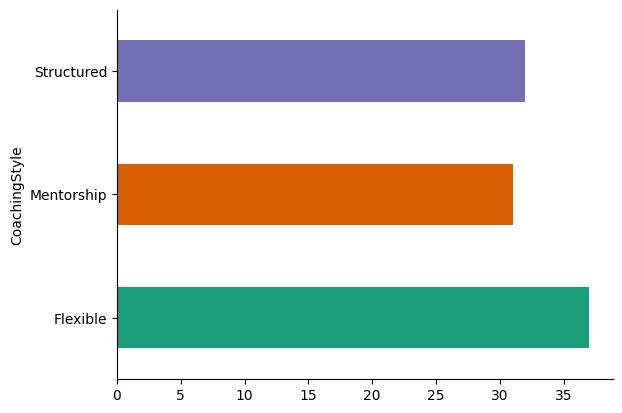

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
employees_df.groupby('CoachingStyle').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

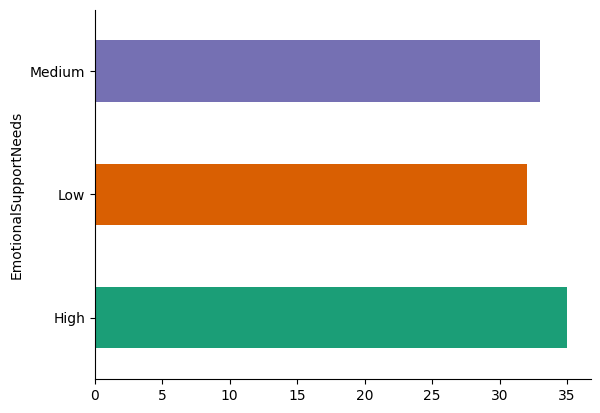

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
employees_df.groupby('EmotionalSupportNeeds').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

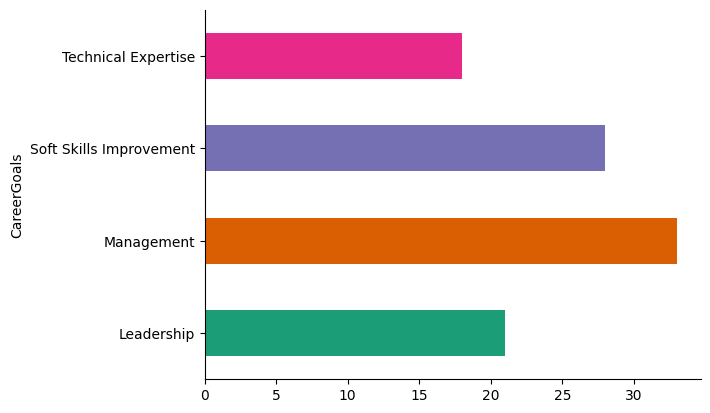

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
employees_df.groupby('CareerGoals').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

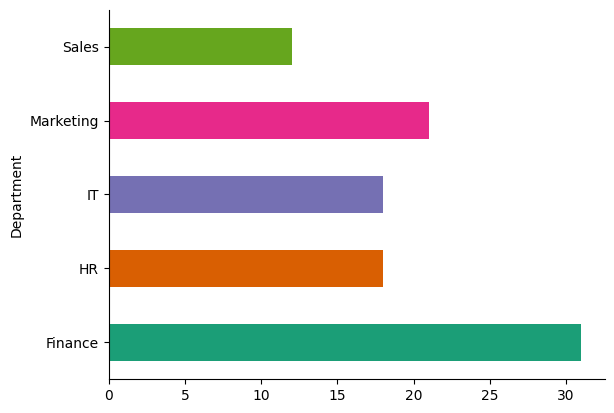

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
employees_df.groupby('Department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Coach Dataframe

In [ ]:
coaches_df = pd.DataFrame(coaches)
display(coaches_df)

,CoachID,Certifications,Specializations,CoachingStyle,ExperienceLevel,Availability
0,C1,"[BCC, ICF]","[Career, Emotional]",Mentorship,6,"[15, 11, 14]"
1,C2,"[ICF, ACC]","[Career, Skill Up]",Mentorship,14,"[11, 15, 12]"
2,C3,"[PCC, BCC]","[Career, Skill Up]",Flexible,14,"[17, 9, 13]"
3,C4,"[BCC, ICF]","[Skill Up, Emotional]",Flexible,13,"[11, 13, 10]"
4,C5,"[ACC, BCC]","[Career, Skill Up]",Mentorship,1,"[17, 11, 13]"
5,C6,"[PCC, ACC]","[Career, Skill Up]",Structured,11,"[14, 11, 10]"
6,C7,"[PCC, BCC]","[Career, Emotional]",Flexible,13,"[15, 14, 13]"
7,C8,"[ACC, BCC]","[Emotional, Skill Up]",Structured,14,"[12, 16, 14]"
8,C9,"[PCC, ACC]","[Skill Up, Emotional]",Mentorship,7,"[13, 9, 17]"
9,C10,"[PCC, BCC]","[Career, Skill Up]",Flexible,16,"[15, 14, 10]"


<ipython-input-72-4649c8d546f9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(coaches_df, x='ExperienceLevel', y='CoachingStyle', inner='stick', palette='Dark2')


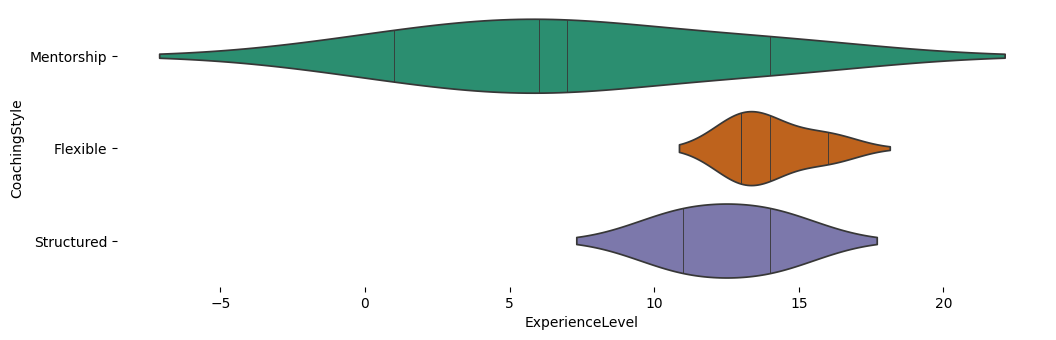

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(coaches_df['CoachingStyle'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(coaches_df, x='ExperienceLevel', y='CoachingStyle', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

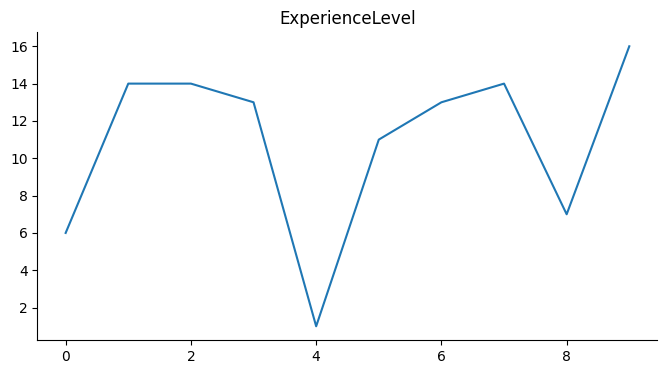

In [ ]:
from matplotlib import pyplot as plt
coaches_df['ExperienceLevel'].plot(kind='line', figsize=(8, 4), title='ExperienceLevel')
plt.gca().spines[['top', 'right']].set_visible(False)

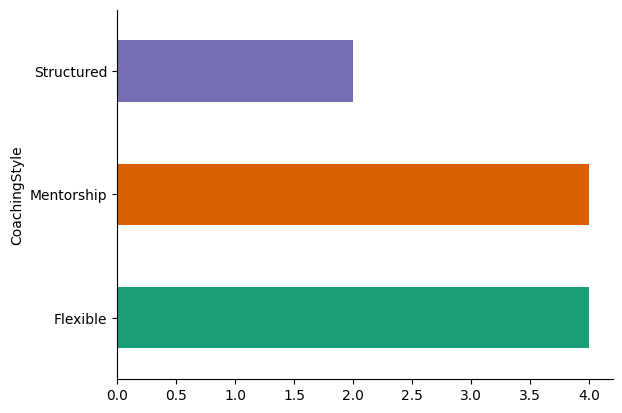

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
coaches_df.groupby('CoachingStyle').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

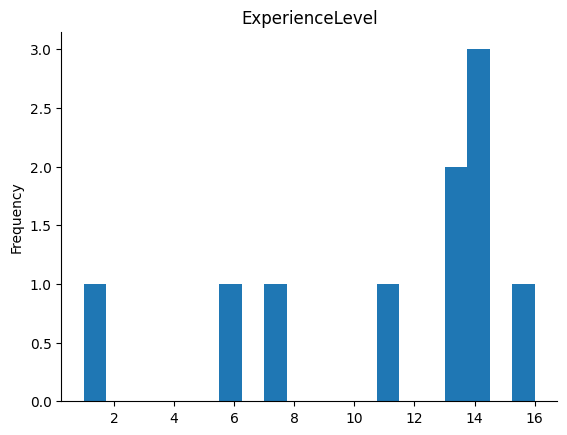

In [ ]:
from matplotlib import pyplot as plt
coaches_df['ExperienceLevel'].plot(kind='hist', bins=20, title='ExperienceLevel')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Preparing Data

## Define the compatibility scoring system


In [ ]:
def calculate_compatibility_score(employee, coach):
    score = 0
    if employee['Department'] in ['IT', 'Finance'] and 'Career' in coach['Specializations']:
        score += 2
    if employee['CareerGoals'] == 'Leadership' and 'Career' in coach['Specializations']:
        score += 2
    if employee['EmotionalSupportNeeds'] == 'High' and 'Emotional' in coach['Specializations']:
        score += 2
    if any(skill in coach['Specializations'] for skill in employee['SkillDevelopmentAreas']):
        score += 2
    if employee['CoachingStyle'] == coach['CoachingStyle']:
        score += 1
    if set(employee['Availability']).intersection(set(coach['Availability'])):
        score += 1
    return score

## Create the training dataset

In [ ]:
data = []
for emp in employees:
    for coach in coaches:
        score = calculate_compatibility_score(emp, coach)
        data.append({
            'Department': emp['Department'],
            'CareerGoals': emp['CareerGoals'],
            'EmotionalSupportNeeds': emp['EmotionalSupportNeeds'],
            'CoachingStyle': emp['CoachingStyle'],
            'ExperienceLevel': coach['ExperienceLevel'],
            'CompatibilityScore': score
        })

## Convert to DataFrame

In [ ]:
data_df = pd.DataFrame(data)
display(data_df)

,Department,CareerGoals,EmotionalSupportNeeds,CoachingStyle,ExperienceLevel,CompatibilityScore
0,Marketing,Management,Medium,Structured,6,1
1,Marketing,Management,Medium,Structured,14,1
2,Marketing,Management,Medium,Structured,14,1
3,Marketing,Management,Medium,Structured,13,1
4,Marketing,Management,Medium,Structured,1,1
...,...,...,...,...,...,...
995,Finance,Leadership,Medium,Flexible,11,5
996,Finance,Leadership,Medium,Flexible,13,6
997,Finance,Leadership,Medium,Flexible,14,1
998,Finance,Leadership,Medium,Flexible,7,1


## Encode categorical variables


In [ ]:
label_encoders = {}
for column in ['Department', 'CareerGoals', 'EmotionalSupportNeeds', 'CoachingStyle']:
    label_encoders[column] = LabelEncoder()
    data_df[column] = label_encoders[column].fit_transform(data_df[column])

## Split the data into features (X) and target (y)


In [ ]:
X = data_df.drop('CompatibilityScore', axis=1)
y = data_df['CompatibilityScore']

## Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Input layers


In [ ]:
input_department = Input(shape=(1,))
input_career_goals = Input(shape=(1,))
input_emotional_support_needs = Input(shape=(1,))
input_coaching_style = Input(shape=(1,))
input_experience_level = Input(shape=(1,))

## Embedding layers


In [ ]:
embedding_department = Embedding(input_dim=len(departments), output_dim=4)(input_department)
embedding_career_goals = Embedding(input_dim=len(career_goals), output_dim=4)(input_career_goals)
embedding_emotional_support_needs = Embedding(input_dim=len(emotional_support_needs), output_dim=4)(input_emotional_support_needs)
embedding_coaching_style = Embedding(input_dim=len(coaching_styles), output_dim=4)(input_coaching_style)

## Flatten embedding layers


In [ ]:
flat_department = Flatten()(embedding_department)
flat_career_goals = Flatten()(embedding_career_goals)
flat_emotional_support_needs = Flatten()(embedding_emotional_support_needs)
flat_coaching_style = Flatten()(embedding_coaching_style)

## Concatenate all features


In [ ]:
concatenated = Concatenate()([flat_department, flat_career_goals, flat_emotional_support_needs, flat_coaching_style, input_experience_level])

# Build the model

## Fully connected layers


In [ ]:
x = Dense(64, activation='relu')(concatenated)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='linear')(x)  # For regression (predicting compatibility score)

## Define the model

In [ ]:
model = Model(inputs=[input_department, input_career_goals, input_emotional_support_needs, input_coaching_style, input_experience_level], outputs=output)

## Compile the model


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

## Prepare input data for the model


In [ ]:
train_inputs = [X_train['Department'], X_train['CareerGoals'], X_train['EmotionalSupportNeeds'], X_train['CoachingStyle'], X_train['ExperienceLevel']]
test_inputs = [X_test['Department'], X_test['CareerGoals'], X_test['EmotionalSupportNeeds'], X_test['CoachingStyle'], X_test['ExperienceLevel']]

## Train the model


In [ ]:
model.fit(train_inputs, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
64/64 [==============================] - 2s 8ms/step - loss: 10.0653 - mae: 2.5357 - val_loss: 8.5480 - val_mae: 2.5271
Epoch 2/50
64/64 [==============================] - 0s 4ms/step - loss: 8.1999 - mae: 2.2383 - val_loss: 4.6824 - val_mae: 1.7063
Epoch 3/50
64/64 [==============================] - 0s 5ms/step - loss: 6.2036 - mae: 2.0050 - val_loss: 3.8226 - val_mae: 1.4988
Epoch 4/50
64/64 [==============================] - 0s 4ms/step - loss: 4.9205 - mae: 1.7560 - val_loss: 3.1518 - val_mae: 1.4027
Epoch 5/50
64/64 [==============================] - 0s 5ms/step - loss: 4.5209 - mae: 1.6573 - val_loss: 2.9895 - val_mae: 1.3610
Epoch 6/50
64/64 [==============================] - 0s 5ms/step - loss: 4.2669 - mae: 1.6081 - val_loss: 2.5691 - val_mae: 1.2701
Epoch 7/50
64/64 [==============================] - 0s 4ms/step - loss: 3.8116 - mae: 1.5317 - val_loss: 2.2256 - val_mae: 1.1816
Epoch 8/50
64/64 [==============================] - 0s 4ms/step - loss: 3.5921 - mae: 1.4

# Evaluate and Test the Model

## Evaluate the model


In [ ]:
loss, mae = model.evaluate(test_inputs, y_test)
print(f"Mean Absolute Error: {mae}")

7/7 [==============================] - 0s 3ms/step - loss: 1.2799 - mae: 0.9136
Mean Absolute Error: 0.9136075377464294


## Predicting matches for new employee

In [ ]:
new_employee = {
    'Department': 'IT',
    'CareerGoals': 'Leadership',
    'EmotionalSupportNeeds': 'High',
    'SkillDevelopmentAreas': ['Python', 'Data Analysis'],
    'CoachingStyle': 'Structured',
    'Availability': [10, 11, 12]
}

In [ ]:
new_employee_df = pd.DataFrame([new_employee])
display(new_employee_df)

,Department,CareerGoals,EmotionalSupportNeeds,SkillDevelopmentAreas,CoachingStyle,Availability
0,IT,Leadership,High,"[Python, Data Analysis]",Structured,"[10, 11, 12]"


## Encode new employee data


In [ ]:
new_employee_encoded = {
    'Department': label_encoders['Department'].transform([new_employee['Department']])[0],
    'CareerGoals': label_encoders['CareerGoals'].transform([new_employee['CareerGoals']])[0],
    'EmotionalSupportNeeds': label_encoders['EmotionalSupportNeeds'].transform([new_employee['EmotionalSupportNeeds']])[0],
    'CoachingStyle': label_encoders['CoachingStyle'].transform([new_employee['CoachingStyle']])[0]
}

In [ ]:
new_rankings = []
for coach in coaches:
    # Prepare each input as a separate NumPy array
    department_input = np.array([new_employee_encoded['Department']])
    career_goals_input = np.array([new_employee_encoded['CareerGoals']])
    emotional_support_input = np.array([new_employee_encoded['EmotionalSupportNeeds']])
    coaching_style_input = np.array([new_employee_encoded['CoachingStyle']])
    experience_level_input = np.array([coach['ExperienceLevel']])

    # Pass each input separately to the model
    score = model.predict([
        department_input,
        career_goals_input,
        emotional_support_input,
        coaching_style_input,
        experience_level_input
    ])[0][0]

    new_rankings.append({
        'CoachID': coach['CoachID'],
        'CompatibilityScore': score
    })

1/1 [==============================] - 0s 25ms/step


## Convert to DataFrame and sort by score


In [ ]:
new_rankings_df = pd.DataFrame(new_rankings)
new_rankings_df = new_rankings_df.sort_values(by='CompatibilityScore', ascending=False)

## Output: List of top matches for the new employee

In [ ]:
print("\nPredicted Matches for New Employee:")
display(new_rankings_df.head(10))


Predicted Matches for New Employee:


,CoachID,CompatibilityScore
4,C5,4.637507
0,C1,4.239646
8,C9,4.229666
5,C6,4.174442
9,C10,4.156449
1,C2,4.129419
2,C3,4.129419
7,C8,4.129419
3,C4,4.121680
6,C7,4.121680


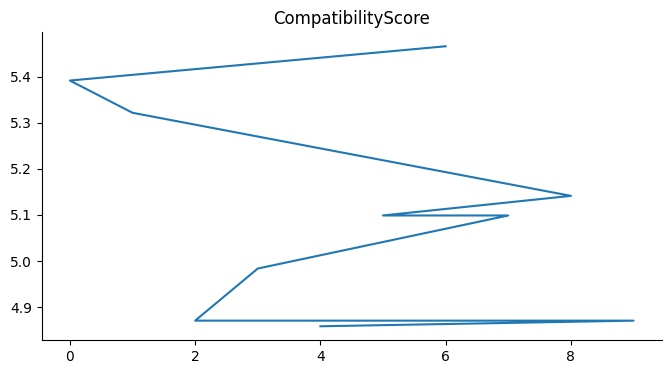

In [ ]:
from matplotlib import pyplot as plt
_df_1['CompatibilityScore'].plot(kind='line', figsize=(8, 4), title='CompatibilityScore')
plt.gca().spines[['top', 'right']].set_visible(False)

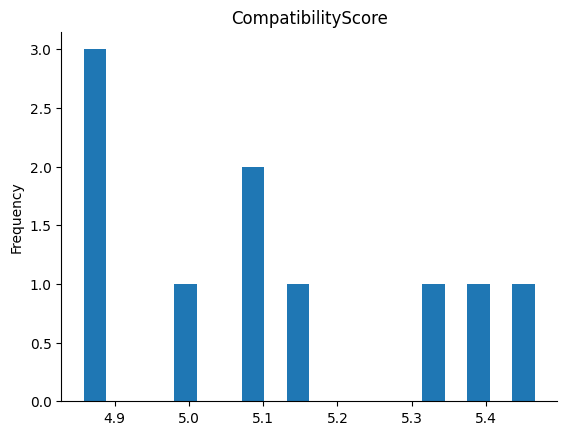

In [ ]:
from matplotlib import pyplot as plt
_df_0['CompatibilityScore'].plot(kind='hist', bins=20, title='CompatibilityScore')
plt.gca().spines[['top', 'right',]].set_visible(False)